In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv("car data.csv")

In [5]:
df.sample(5)

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
295,city,2015,8.55,13.09,60076,Diesel,Dealer,Manual,0
17,ertiga,2016,7.75,10.79,43000,Diesel,Dealer,Manual,0
179,Honda Karizma,2010,0.31,1.05,213000,Petrol,Individual,Manual,0
88,etios liva,2013,3.45,6.05,47000,Petrol,Dealer,Manual,0
260,city,2016,9.15,13.60,29223,Petrol,Dealer,Manual,0


In [6]:
df.shape

(301, 9)

In [7]:
df.isna().values.any() # so there is no any value

False

In [8]:
print("Fuel Type: ", df.Fuel_Type.unique())
print("Seller Type: ", df.Seller_Type.unique())
print("Transmission: ", df.Transmission.unique())
print("Owner: ", df.Owner.unique())

Fuel Type:  ['Petrol' 'Diesel' 'CNG']
Seller Type:  ['Dealer' 'Individual']
Transmission:  ['Manual' 'Automatic']
Owner:  [0 1 3]


In [9]:
from datetime import datetime

df["Current_year"] = datetime.now().year

df["Year"] = df.Current_year - df.Year
df['Current_year']

0      2022
1      2022
2      2022
3      2022
4      2022
       ... 
296    2022
297    2022
298    2022
299    2022
300    2022
Name: Current_year, Length: 301, dtype: int64

In [10]:
df.drop(columns="Current_year", axis = 1, inplace = True)

In [11]:
dummy = pd.get_dummies(df[["Fuel_Type", "Seller_Type", "Transmission"]], drop_first = True)

df = pd.concat( [df, dummy], axis = 1)

df.drop(columns = ["Fuel_Type", "Seller_Type", "Transmission"], inplace = True)

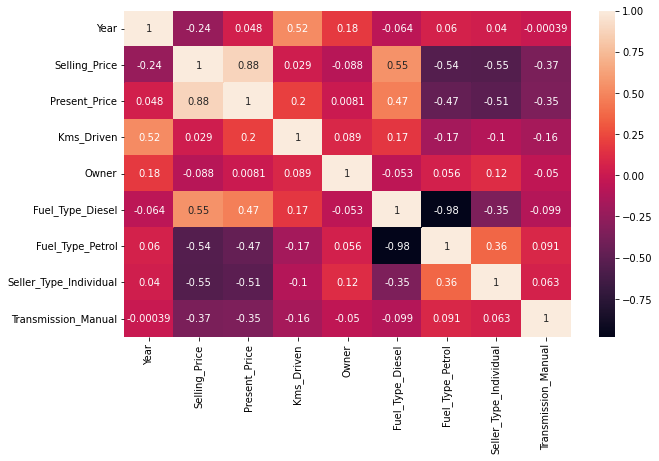

In [12]:
# let's get a corelation of our data

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), annot = True)
plt.show()

In [13]:
# let's encode Car_Name text data using one hot encoding

# for this let's convert first Car_Names data into lowercase

df.Car_Name = df.Car_Name.str.lower()

dummy = pd.get_dummies(df.Car_Name, drop_first = True)
# here we dropped first columns which is 800 for prevent dummy variable trap 

df = pd.concat([df, dummy], axis = 1)
# now we don't need Car_Name columns so let's drop it
df.drop("Car_Name", axis = 1, inplace = True)

In [14]:
X = df.drop(columns="Selling_Price")
y = df.Selling_Price

In [15]:
from sklearn.ensemble import ExtraTreesRegressor

etr = ExtraTreesRegressor()
etr.fit(X, y)
important_features = etr.feature_importances_

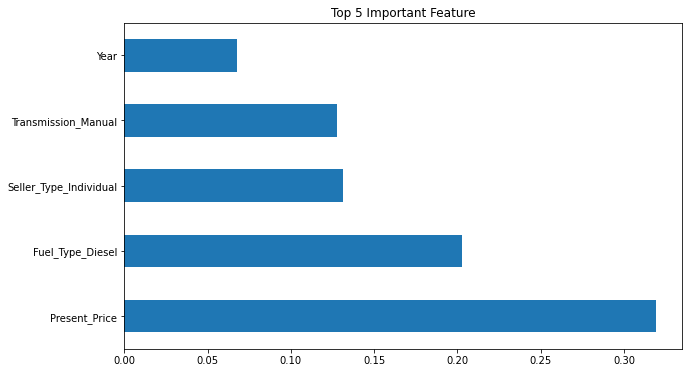

In [16]:
important_features = pd.Series(important_features, index = X.columns).sort_values(ascending = False)

plt.figure(figsize = (10, 6))
important_features[:5].plot(kind = "barh")
plt.title("Top 5 Important Feature")

plt.show()

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf_random = RandomForestRegressor()

In [19]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_features = ['auto']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,20,40]
min_samples_leaf = [1,2,4,8]

In [20]:
from sklearn.model_selection import RandomizedSearchCV

In [21]:
random_grid = {'n_estimators' : n_estimators,
               'max_features' : max_features,
               'max_depth' : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf' : min_samples_leaf
               }

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 20, 40], 'min_samples_leaf': [1, 2, 4, 8]}


In [22]:
rf = RandomForestRegressor()
random_rf = RandomizedSearchCV(estimator = rf,param_distributions=random_grid,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=2,random_state=42,n_jobs=1)

In [23]:
random_rf.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1100; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1100; total time=   1.6s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1100; total time=   1.5s
[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=20, n_estimators=1100; total time=   1.5s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=900; total time=   1.3s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=900; total time=   1.9s
[CV] END max_depth=20, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1, 2, 4, 8],
                                        'min_samples_split': [2, 5, 10, 20, 40],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [24]:
predictions = random_rf.predict(X_test)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


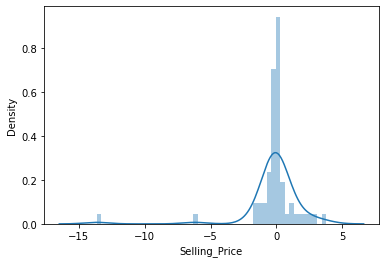

In [25]:
sns.distplot(y_test-predictions)

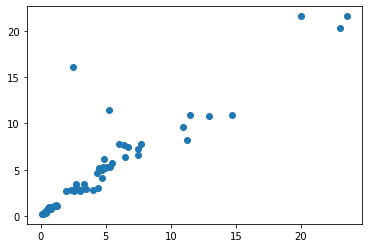

In [26]:
plt.scatter(y_test,predictions)

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [28]:
algos = {
    "Linear Regression": {
        "model": LinearRegression(),
        "param":{
            "normalize":[True, False]
        }
    },
    "Decision Tree": {
        "model": DecisionTreeRegressor(),
        "param": {
            "criterion": ["mse", "friedman_mse"],
            "splitter": ["best", "random"]
        }
    },
    "Random Forest": {
        "model": RandomForestRegressor(),
        "param": {
            "n_estimators": [int(x) for x in np.linspace(100, 1200, 12)],
            "max_features": ["auto", "sqrt"],
            "max_depth": [int(x) for x in np.linspace(5, 30, 6)],
            "min_samples_split": [2, 5, 10, 15, 100],
            "min_samples_leaf": [1, 2, 5, 10]
        }
    }
}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

best_models = {}
scores = []
for model_name, values in algos.items():
    model_tunning = RandomizedSearchCV(values["model"], values["param"], n_iter=10, cv = 5, n_jobs = -1)
    model_tunning.fit(X_train, y_train)
    
    best_models[model_name] = model_tunning
    scores.append({
        "Model": model_name,
        "Best Parameters": model_tunning.best_params_,
        "Best Score": model_tunning.best_score_
    })
    
pd.DataFrame(scores)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please use sklearn.preprocessing.StandardScaler instead.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


,Model,Best Parameters,Best Score
0,Linear Regression,{'normalize': False},0.315150
1,Decision Tree,"{'splitter': 'random', 'criterion': 'friedman_...",0.816288
2,Random Forest,"{'n_estimators': 400, 'min_samples_split': 2, ...",0.847367


In [30]:
for name, model in best_models.items():
    print(name, " : ", model.score(X_test, y_test))


Linear Regression  :  0.5824139176599454
Decision Tree  :  0.7371241585378088
Random Forest  :  0.8856435178732164


##### so we can see above when we test those trained model using test data we get random forest is best algorithm with 88% accuracy 

In [31]:
final_model = best_models["Random Forest"]

In [32]:
def predict_price(year, present_price, kms, owner, diesel, petrol, individual, manual, vehicle):
    vehicle_index = np.where(X.columns == vehicle.lower())[0][0]
    X_pred = np.zeros_like(X.columns)
    
    feature_list = [year, present_price, kms, owner, diesel, petrol, individual, manual]
    count = 0
    for f in feature_list:
        X_pred[count] = f
        count += 1
    
    if vehicle_index > 0:
        X_pred[vehicle_index] = 1
    
    result = final_model.predict([X_pred])
    
    return result


In [33]:
predict_price(8, 9.54, 43000, 0, 1, 0, 0, 1, "creta")

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"


array([6.40540922])

In [34]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(final_model, f)

In [35]:
import json

column_dict = {"data_columns": X.columns.to_list()}

with open("columns.json", "w") as f:
    json.dump(column_dict, f)

In [36]:
df['Year'].values

array([ 8,  9,  5, 11,  8,  4,  7,  7,  6,  7,  5,  7,  7,  7, 13,  6,  7,
        6,  7, 12,  6,  5, 11,  8,  9, 11,  9,  5, 12,  7, 10, 11,  8,  8,
        8, 11,  7, 19,  6, 19,  6,  8, 14,  8, 10,  8,  9, 16,  7,  5, 10,
        7,  5,  9, 17, 13,  7, 12,  8,  8,  9,  7,  8,  7,  5,  8,  5, 12,
       11,  6,  8, 11,  9, 11,  8,  7,  9, 18, 12, 10,  6,  7,  5,  7, 17,
       16, 12, 10,  9,  8, 13,  8, 17,  7, 14, 10,  6,  5,  9, 12,  6,  5,
        5,  5,  5,  7,  8,  9,  6,  5,  6,  6,  8,  6,  7,  7,  9,  7,  7,
        9,  6, 11,  6,  9, 10, 13,  5,  6,  5,  5,  5,  7,  5,  6,  5,  7,
        8,  9,  6,  7,  9,  6,  7,  6,  8, 10,  8,  7, 12,  6, 11,  6, 10,
        9,  8,  5,  5,  7,  5,  5, 11,  8, 10, 12,  6,  6,  6,  8,  9,  7,
       10,  7,  8,  5,  7, 11, 11,  6,  8, 12, 10,  6,  9,  9, 14, 14, 12,
        9,  9, 17, 14, 10, 15,  9, 14,  7, 14, 12, 11, 15, 16, 12,  7, 11,
        7,  6,  5,  7,  5,  7, 10,  7,  6, 11,  5, 10,  6,  6,  8, 10,  5,
        9,  8,  7,  9, 11

In [37]:
df.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual,activa 3g,...,um renegade mojave,verna,vitara brezza,wagon r,xcent,yamaha fazer,yamaha fz v 2.0,yamaha fz 16,yamaha fz s,yamaha fz s v 2.0
0,8,3.35,5.59,27000,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,9,4.75,9.54,43000,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,5,7.25,9.85,6900,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,11,2.85,4.15,5200,0,0,1,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,8,4.60,6.87,42450,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
